In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Data1\\Data1\\section 7\\all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [4]:
companies = df.Name.unique()
companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

### get closing values for ZTS

In [5]:
z = df.loc[df['Name']== 'ZTS']
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 617781 to 619039
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [6]:
z.head()

,date,open,high,low,close,volume,Name
617781,2013-02-08,32.31,33.48,32.30,33.05,2599232,ZTS
617782,2013-02-11,33.06,33.50,32.88,33.26,1486115,ZTS
617783,2013-02-12,33.40,34.00,33.15,33.74,1637279,ZTS
617784,2013-02-13,33.80,33.80,33.00,33.55,1269625,ZTS
617785,2013-02-14,33.39,33.45,32.77,33.27,2954324,ZTS


In [7]:
z.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [9]:
# creating an array with closing price
trainingd = z.iloc[:, 4:5].values

In [10]:
trainingd

array([[33.05],
       [33.26],
       [33.74],
       ...,
       [73.83],
       [73.27],
       [73.86]])

### normalizing the values

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)

In [14]:
training_set_scaled

array([[0.08995937],
       [0.09402205],
       [0.10330818],
       ...,
       [0.8788934 ],
       [0.86805959],
       [0.87947379]])

### x-train stores the values of closing prices of past 45 days
### y_train stores the values of closing prices of the present day

In [25]:
x_train = []
y_train = []
timestamp = 45
length = len(trainingd)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [16]:
print(x_train[0])
print('\n')
print(y_train[0])

[0.08995937 0.09402205 0.10330818 0.09963242 0.09421552 0.10795125
 0.10524279 0.08357516 0.08047978 0.08106017 0.07100019 0.07041981
 0.07583672 0.09769781 0.11994583 0.11510931 0.11394854 0.10543625
 0.11917199 0.11007932 0.11182047 0.10485587 0.10833817 0.12071967
 0.09750435 0.08589669 0.08512285 0.09885858 0.09808474 0.0913136
 0.07854517 0.07951248 0.08396208 0.09673051 0.08106017 0.08028632
 0.0798994  0.06655059 0.06887212 0.08744438 0.09750435 0.09189398
 0.09208744 0.09344167 0.07428903]


0.0930547494679822


### prepare the data

In [30]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1214, 45, 1)

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [32]:
model = Sequential() #define the Keras model

model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1))) #120 neurons in the hidden layer
##return_sequences=True makes LSTM layer to return the full history including outputs at all times
model.add(Dropout(0.2))

model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, return_sequences = False)) 
model.add(Dropout(0.2))

model.add(Dense(units = 1)) #output
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
1214/1214 [==============================] - 8s 7ms/step - loss: 0.0136
Epoch 2/25
1214/1214 [==============================] - 7s 6ms/step - loss: 0.0024
Epoch 3/25
1214/1214 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 4/25
1214/1214 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 5/25
1214/1214 [==============================] - 6s 5ms/step - loss: 0.0023
Epoch 6/25
1214/1214 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 7/25
1214/1214 [==============================] - 7s 5ms/step - loss: 0.0018
Epoch 8/25
1214/1214 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 9/25
1214/1214 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 10/25
1214/1214 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 11/25
1214/1214 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 12/25
1214/1214 [==============

### forecasting(on other companies)

In [39]:
test_set = df.loc[df['Name'] == 'BA']
test_set  = test_set.loc[:, test_set.columns == 'close']

In [40]:
test_set

,close
75388,76.56
75389,75.87
75390,75.99
75391,74.78
75392,74.93
...,...
76642,356.94
76643,348.91
76644,328.88
76645,340.91


In [44]:
# storing the actual stock prices in y_test starting from 45th day as a previous
# 45 days are used to predict  the present day value

y_test = test_set.iloc[timestamp:, 0:].values
y_test

array([[ 86.89],
       [ 86.69],
       [ 86.12],
       ...,
       [328.88],
       [340.91],
       [348.12]])

In [47]:
## storing all values in a variable for generating an input array for our model
closing_price = test_set.iloc[:, 0:].values
closing_price_scaled = sc.transform(closing_price)

closing_price_scaled

array([[0.93170826],
       [0.91835945],
       [0.92068098],
       ...,
       [5.81311666],
       [6.04585026],
       [6.18533565]])

In [48]:
# the model will predict the values on x_test
x_test = []
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(closing_price_scaled[i - timestamp:i, 0])
    
x_test = np.array(x_test)
x_test.shape

(1214, 45)

In [49]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1214, 45, 1)

In [50]:
#predicting the stock values
y_pred = model.predict(x_test)
predicted_price = sc.inverse_transform(y_pred)

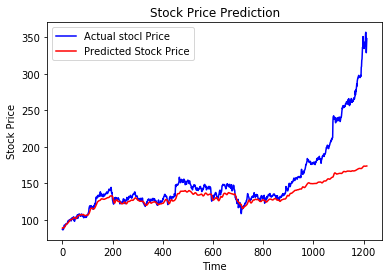

In [52]:
# plotting the result
plt.plot(y_test, color ='blue', label='Actual stocl Price')
plt.plot(predicted_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()